In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import TextIOWrapper
from zipfile import ZipFile
import io

from matplotlib.colors import LinearSegmentedColormap

from numpy import array
from numpy import argmax

from sklearn import tree
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score


# Files were previously uploaded from data cleaning onto Github repository.
# Just need to pull them up with the following:

feat_url = "https://raw.githubusercontent.com/jasmultani5391/Census-Data/master/featDF.csv"
download1 = requests.get(feat_url).content

complete_url = "https://raw.githubusercontent.com/jasmultani5391/Census-Data/master/completeDF.csv"
download2 = requests.get(complete_url).content

# Read the downloaded content and turn it into a pandas dataframe
featDF = pd.read_csv(io.StringIO(download1.decode('utf-8')))
completeDF = pd.read_csv(io.StringIO(download2.decode('utf-8')))

#print(featDF.head(4))
#print(completeDF.head(4))


In [2]:
class EvaluateModel(object):
    # Calculate best K for KNeighborsClassifier. Set iteration out of 100.
    def __init__(self, train_data, test_data, train_label, test_label, k):
        self.train_data = train_data
        self.test_data = test_data
        self.train_label = train_label
        self.test_label = test_label
        self.k = k
        
    def knn_eval(self):
        kvalue = []
        k_accuracy = []
        k_precision = []
        k_recall = []
        k_f1 = []
        scores= []
        
        for i in range(1, self.k, 1):
            classifier = KNeighborsClassifier(n_neighbors=i)
            classifier.fit(self.train_data, np.ravel(self.train_label))
            accuracy = classifier.score(self.test_data, self.test_label)
            k_accuracy.append(accuracy)
            
            predict_labels = classifier.predict(self.test_data)
            
            precision = precision_score(self.test_label, predict_labels, average='binary')
            k_precision.append(precision)
            
            recall = recall_score(self.test_label, predict_labels, average='binary')
            k_recall.append(recall)
            
            f1 = f1_score(self.test_label, predict_labels, average='binary')
            k_f1.append(f1)
            
            kvalue.append(i)
            
            scores = list(zip(k_accuracy, k_precision, k_recall, k_f1))
        return kvalue, k_accuracy, k_precision, k_recall, k_f1, scores
    
class VisualGraph():
    def graph_eval(self, k_value, score_value, ytitle):
        percent = [round(i*100, 2) for i in score_value]
        max_value = max(percent)
        best_k = k_value[score_value.index(max(score_value))]
        
        # Visualize the answer. Graph lineplot "K-value vs. Returning Accuracy %".
        fig, ax = plt.subplots(figsize=(6, 5))
        plt.plot(k_value, percent)
        plt.scatter(best_k,
                    max_value,
                    c='red',
                    cmap='jet',
                    s=20,
                    label=('Best K = ' + str(best_k) + ' at value = ' + str(max_value) + '%'))
        plt.xlabel('K Number')
        plt.ylabel('Validation ' + ytitle + '%')
        plt.title('Above or Below 50K line?: best K values measuring ' + ytitle)
        plt.legend(loc=4)
        plt.show()
        return
            
        
        
    

In [3]:
# First, we must find the best K index that gives us the highest
# accuracy. We previously created a class called NearestK that contains
# the method to search for the best K value to use. We'll use the featDF
# over the completeDF because the former contains all the one-hot encoded
# columns that converted qualitative to quantitative data.

labelDF = featDF['salary_label']
featDF = featDF.drop(['salary_label'],
                     axis=1
                     )

In [4]:
# Split data into training (80%) and testing (20%).
trnk_data, tstk_data, trnk_lbl, tstk_lbl = train_test_split(featDF,
                                                            labelDF,
                                                            test_size=0.2,
                                                            random_state=100
                                                            )

knn = EvaluateModel(trnk_data, tstk_data, trnk_lbl, tstk_lbl, 101)

kvalue, k_accuracy, k_precision, k_recall, k_f1, scores_df = knn.knn_eval()

#print(scores_df)




[(0.7964384402824686, 0.5660377358490566, 0.5519053876478318, 0.5588822355289421), (0.8071845256370893, 0.6618004866180048, 0.35742444152431013, 0.4641638225255973), (0.8099478047282775, 0.6005665722379604, 0.557161629434954, 0.5780504430811179), (0.8173165489714461, 0.6700819672131147, 0.4296977660972405, 0.5236188951160929), (0.8081056186674854, 0.6002949852507374, 0.5348226018396847, 0.5656706045865184), (0.8182376420018422, 0.6603415559772297, 0.45729303547963207, 0.5403726708074534), (0.8185446730119742, 0.6287878787878788, 0.545335085413929, 0.5840957072484166), (0.8246852932146147, 0.6759259259259259, 0.47963206307490147, 0.5611068408916219), (0.8182376420018422, 0.6294027565084227, 0.5400788436268068, 0.5813295615275813), (0.8283696653361989, 0.6797153024911032, 0.5019710906701709, 0.5774754346182918), (0.8240712311943507, 0.6455108359133127, 0.5479632063074902, 0.5927505330490405), (0.8262204482652747, 0.6701570680628273, 0.5045992115637319, 0.5757121439280359), (0.82652747927

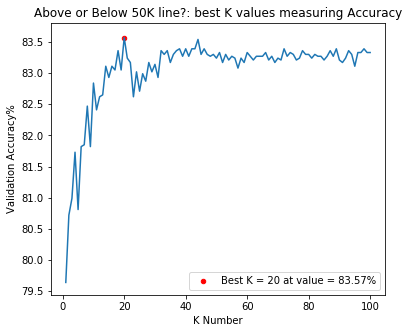

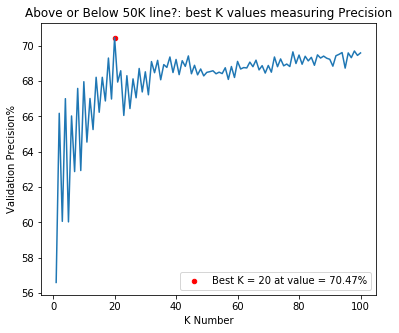

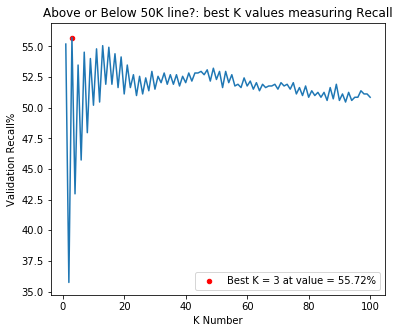

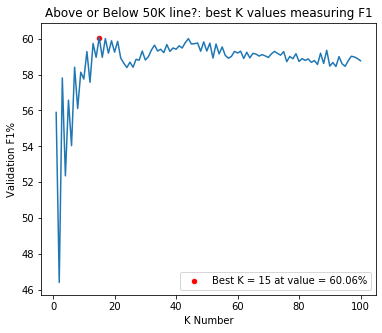

In [5]:
accuracy_graph = VisualGraph()
accuracy_graph = accuracy_graph.graph_eval(kvalue, k_accuracy, 'Accuracy')

precision_graph = VisualGraph()
precision_graph = precision_graph.graph_eval(kvalue, k_precision, 'Precision')

recall_graph = VisualGraph()
recall_graph = recall_graph.graph_eval(kvalue, k_recall, 'Recall')

f1_graph = VisualGraph()
f1_graph = f1_graph.graph_eval(kvalue, k_f1, 'F1')

In [12]:
scores_label = ['Accuracy',
                'Precision',
                'Recall',
                'F1'
               ]

# Reminder that in order to get index of 15, must call for the 14th index
final_evaluation = pd.Series((zip(scores_label, scores_df[14])))
print("When K = 15, we get the following evaluation:" + '\n' + str(final_evaluation))


When K = 15, we get the following evaluation:
0      (Accuracy, 0.829290758366595)
1    (Precision, 0.6624405705229794)
2       (Recall, 0.5492772667542707)
3           (F1, 0.6005747126436781)
dtype: object


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [13]:
# Train model with best k (where F1 is highest)
knn_classifier = KNeighborsClassifier(n_neighbors=15)
knn_classifier.fit(trnk_data, np.ravel(trnk_lbl))

# Score based on train dataset.
train_kscore = knn_classifier.score(trnk_data, trnk_lbl)
print('Train Accuracy Score %: ' + str(round(train_kscore*100, 4)))

predict_trainlabels = knn_classifier.predict(trnk_data)
trainprecision = precision_score(trnk_lbl, predict_trainlabels, average='binary')
print('Train Precision %: ' + str(round(trainprecision*100, 4)))
            
trainrecall = recall_score(trnk_lbl, predict_trainlabels, average='binary')
print('Train Recall %: ' + str(round(trainrecall*100, 4)))

trainf1 = f1_score(trnk_lbl, predict_trainlabels, average='binary')
print('Train F1 %: ' + str(round(trainf1*100, 4)))


print('\n\n')
# Score based on test dataset.
test_kscore = knn_classifier.score(tstk_data, tstk_lbl)
print('Test Accuracy Score %: ' + str(round(test_kscore*100, 4)))

predict_testlabels = knn_classifier.predict(tstk_data)
testprecision = precision_score(tstk_lbl, predict_testlabels, average='binary')
print('Test Precision %: ' + str(round(testprecision*100, 4)))
            
testrecall = recall_score(tstk_lbl, predict_testlabels, average='binary')
print('Test Recall %: ' + str(round(testrecall*100, 4)))

testf1 = f1_score(tstk_lbl, predict_testlabels, average='binary')
print('Test F1 %: ' + str(round(testf1*100, 4)))

Train Accuracy Score %: 84.5132
Train Precision %: 73.545
Train Recall %: 54.0681
Train F1 %: 62.3202



Test Accuracy Score %: 83.5738
Test Precision %: 70.471
Test Recall %: 51.117
Test F1 %: 59.2536


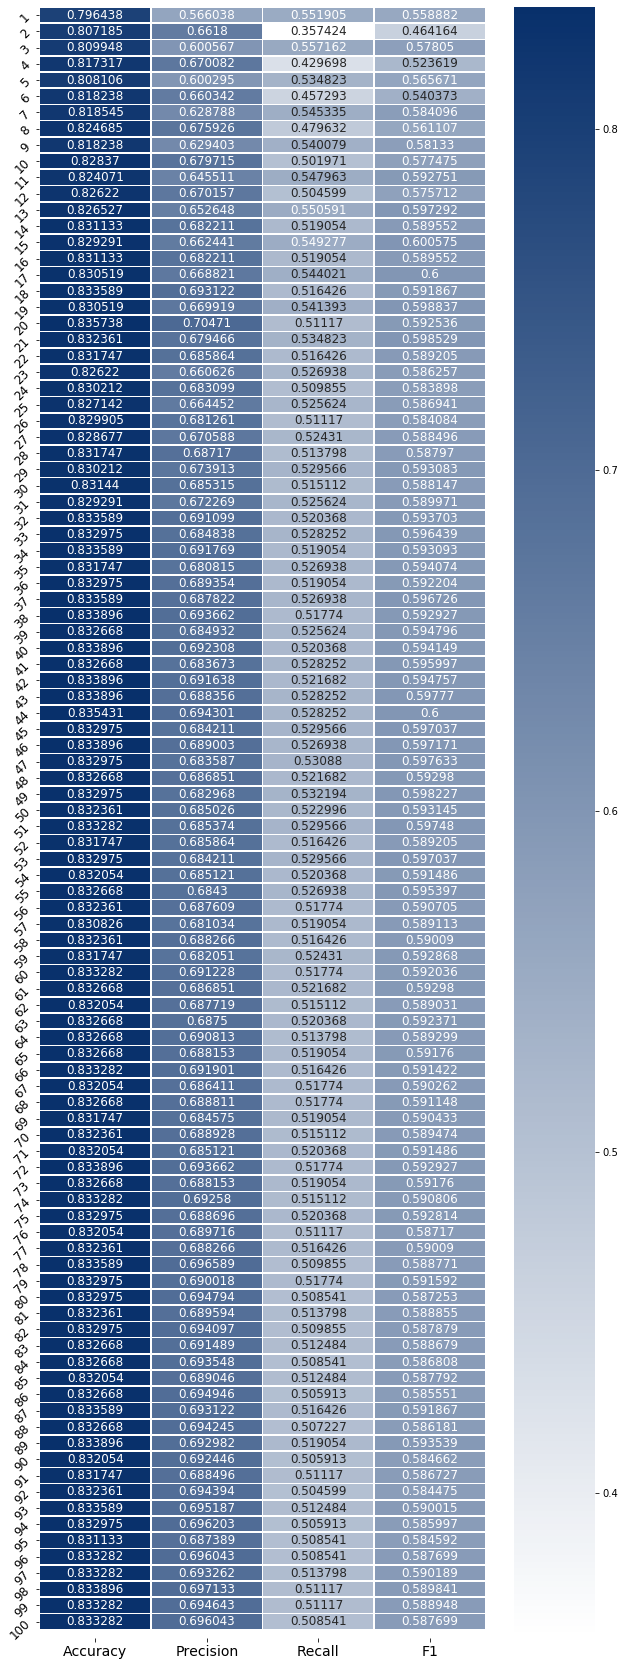

In [10]:
min_color = 'white'
max_color = (0.03137254,
             0.18823529411,
             0.41960784313,
             1
             )

cmap = LinearSegmentedColormap.from_list("", [min_color, max_color])

fig, ax = plt.subplots(figsize=(10, 30))
fig = sns.heatmap(scores_df,
                  annot=True,
                  cmap=cmap,
                  fmt='g',
                  cbar=True,
                  xticklabels=scores_label,
                  yticklabels=kvalue,
                  linewidths=.7,
                  annot_kws={"fontsize":12},
                  ax=ax
                  )
plt.xticks(rotation=0)
plt.yticks(rotation=45)
fig.set_ylim(100.5, 0)  # First value should be (#of rows) + (.5).
fig.set_xlim(0, 4)  # Second value should be # of columns
fig.xaxis.set_tick_params(labelsize=14)
fig.yaxis.set_tick_params(labelsize=12)
plt.show()
